In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
df = pd.read_csv('test.csv')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [3]:
df.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [5]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [6]:
def cabin_deck(x):
    if pd.isnull(x):
        return np.nan
    else:
        return str(x).split('/')[0]

In [7]:
df['Cabin_Deck'] = df['Cabin'].apply(lambda x: cabin_deck(x))

In [8]:
def cabin_to_side(x):
    if pd.isnull(x):
        return np.nan
    else:
        return str(x).split('/')[-1]

In [9]:
df['Cabin_Side'] = df['Cabin'].apply(lambda x: cabin_to_side(x))

In [10]:
100 * df.isna().sum()/len(df)

PassengerId     0.000000
HomePlanet      2.034136
CryoSleep       2.174421
Cabin           2.338087
Destination     2.151040
Age             2.127660
VIP             2.174421
RoomService     1.917232
FoodCourt       2.478373
ShoppingMall    2.291326
Spa             2.361468
VRDeck          1.870470
Name            2.197802
Cabin_Deck      2.338087
Cabin_Side      2.338087
dtype: float64

In [11]:
df2 = df.copy()

In [12]:
for i in df2.select_dtypes(include=['object']).columns:
    print(f"{i} ---> {df2[i].nunique()} ")

PassengerId ---> 4277 
HomePlanet ---> 3 
CryoSleep ---> 2 
Cabin ---> 3265 
Destination ---> 3 
VIP ---> 2 
Name ---> 4176 
Cabin_Deck ---> 8 
Cabin_Side ---> 2 


In [13]:
df2.drop(['PassengerId','Cabin','Name'],axis=1,inplace=True)

In [14]:
for i in df2['HomePlanet'].dropna().unique():
    for j in df2['VIP'].dropna().unique():
        print(f'Homeplanet-->{i} and VIP--> {j}')
        print(df2[(df2['HomePlanet']==i) & (df2['VIP']==j)]['Age'].dropna().median())
        print('\n')

Homeplanet-->Earth and VIP--> False
23.0


Homeplanet-->Earth and VIP--> True
nan


Homeplanet-->Europa and VIP--> False
32.0


Homeplanet-->Europa and VIP--> True
32.0


Homeplanet-->Mars and VIP--> False
27.0


Homeplanet-->Mars and VIP--> True
34.0




In [15]:
df2['HomePlanet'].value_counts()

Earth     2263
Europa    1002
Mars       925
Name: HomePlanet, dtype: int64

In [16]:
df2 = df2.convert_dtypes()

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non-null   string 
 1   CryoSleep     4184 non-null   boolean
 2   Destination   4185 non-null   string 
 3   Age           4186 non-null   Int64  
 4   VIP           4184 non-null   boolean
 5   RoomService   4195 non-null   Int64  
 6   FoodCourt     4171 non-null   Int64  
 7   ShoppingMall  4179 non-null   Int64  
 8   Spa           4176 non-null   Int64  
 9   VRDeck        4197 non-null   Int64  
 10  Cabin_Deck    4177 non-null   string 
 11  Cabin_Side    4177 non-null   string 
dtypes: Int64(6), boolean(2), string(4)
memory usage: 376.0 KB


In [19]:
df3 = df2.copy()

In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non-null   string 
 1   CryoSleep     4184 non-null   boolean
 2   Destination   4185 non-null   string 
 3   Age           4186 non-null   Int64  
 4   VIP           4184 non-null   boolean
 5   RoomService   4195 non-null   Int64  
 6   FoodCourt     4171 non-null   Int64  
 7   ShoppingMall  4179 non-null   Int64  
 8   Spa           4176 non-null   Int64  
 9   VRDeck        4197 non-null   Int64  
 10  Cabin_Deck    4177 non-null   string 
 11  Cabin_Side    4177 non-null   string 
dtypes: Int64(6), boolean(2), string(4)
memory usage: 376.0 KB


In [21]:
for i in df3.select_dtypes(include=['string']).columns:
    print(f" {i} --->  {df3[i].isna().sum()}")
    print(f" {i} --->  {100*df3[i].isna().sum()/len(df3[i])}")

 HomePlanet --->  87
 HomePlanet --->  2.034136076689268
 Destination --->  92
 Destination --->  2.1510404489127892
 Cabin_Deck --->  100
 Cabin_Deck --->  2.3380874444704234
 Cabin_Side --->  100
 Cabin_Side --->  2.3380874444704234


In [22]:
for i in df3.select_dtypes(include=['string']).columns:
    df3[i].fillna('Missing',inplace=True)

In [23]:
df3.isna().sum()

HomePlanet        0
CryoSleep        93
Destination       0
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Cabin_Deck        0
Cabin_Side        0
dtype: int64

In [24]:
df3['Total_Bill'] = df3['RoomService'] + df3['FoodCourt'] + df3['ShoppingMall'] + df3['Spa'] + df3['VRDeck']

In [25]:
df3

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_Deck,Cabin_Side,Total_Bill
0,Earth,True,TRAPPIST-1e,27,False,0,0,0,0,0,G,S,0
1,Earth,False,TRAPPIST-1e,19,False,0,9,0,2823,0,F,S,2832
2,Europa,True,55 Cancri e,31,False,0,0,0,0,0,C,S,0
3,Europa,False,TRAPPIST-1e,38,False,0,6652,0,181,585,C,S,7418
4,Earth,False,TRAPPIST-1e,20,False,10,0,635,0,0,F,S,645
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34,False,0,0,0,0,0,G,S,0
4273,Earth,False,TRAPPIST-1e,42,False,0,847,17,10,144,Missing,Missing,1018
4274,Mars,True,55 Cancri e,<NA>,False,0,0,0,0,0,D,P,0
4275,Europa,False,Missing,<NA>,False,0,2680,0,0,523,D,P,3203


<AxesSubplot:xlabel='HomePlanet', ylabel='Age'>

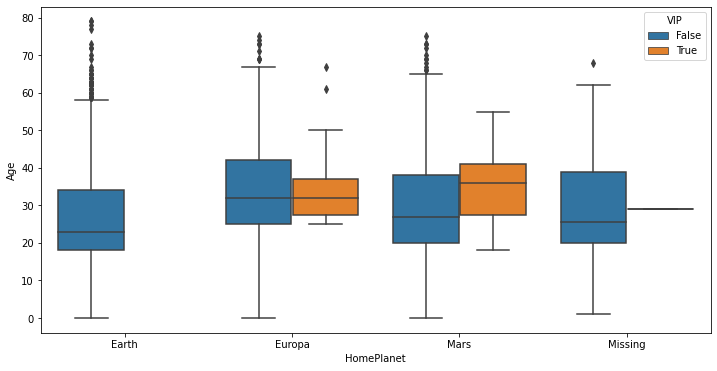

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df3.dropna(),x='HomePlanet',y='Age',hue='VIP')

In [26]:
df3['VIP'].value_counts()

False    4110
True       74
Name: VIP, dtype: Int64

In [28]:
df3[pd.isnull(df3['VIP'])==True]['HomePlanet'].value_counts()

Earth     44
Europa    31
Mars      18
Name: HomePlanet, dtype: Int64

In [29]:
df3['VIP'].fillna(False).value_counts()

False    4203
True       74
Name: VIP, dtype: Int64

In [30]:
df3['VIP'].fillna(False,inplace=True)

In [31]:
def Age_Imputer(cols):
    hp = cols[0]
    vip = cols[1]
    age = cols[2]
    if pd.isnull(age):
        if (hp=='Europa') & (vip==False):
            age=32
        elif (hp=='Europa') & (vip==True):
            age=35
        elif (hp=='Earth') & (vip==False):
            age=23
        elif (hp=='Earth') & (vip==True):
            age=23
        elif (hp=='Mars') & (vip==False):
            age=28
        elif (hp=='Mars') & (vip==True):
            age=32
        elif (hp=='Missing') & (vip==False):
            age=26
        elif (hp=='Missing') & (vip==True):
            age=32
        return age
    else:
        return age

In [32]:
df3['Age'] = df3[['HomePlanet','VIP','Age']].apply(Age_Imputer,axis=1)

<Figure size 864x432 with 0 Axes>

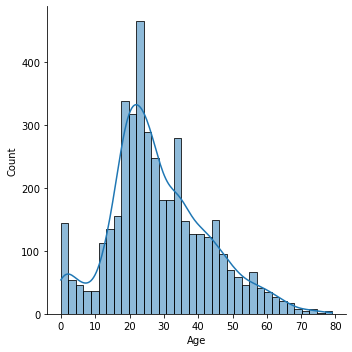

In [33]:
plt.figure(figsize=(12,6))
sns.displot(df2,x='Age',kde=True)

<Figure size 864x432 with 0 Axes>

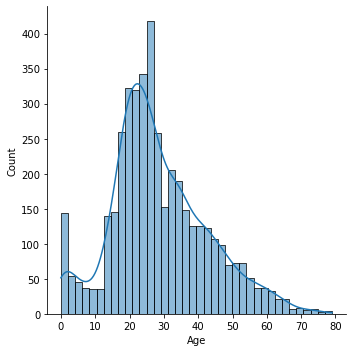

In [34]:
plt.figure(figsize=(12,6))
sns.displot(df3,x='Age',kde=True)

In [35]:
def Cryosleep_Imputer(cols):
    tb = cols[0]
    cp = cols[1]
    if pd.isnull(cp):
        if pd.isnull(tb)==False:
            if tb > 0:
                cp = False
            else:
                cp=True
        else:
            cp = False # as False is the majority and there are only 24 such cases
        
        return cp
    else:
        return cp

In [36]:
df3['CryoSleep'] = df3[['Total_Bill','CryoSleep']].apply(Cryosleep_Imputer,axis=1)

In [37]:
df3.isna().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Cabin_Deck        0
Cabin_Side        0
Total_Bill      455
dtype: int64

In [38]:
df2.isna().sum()

HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Cabin_Deck      100
Cabin_Side      100
dtype: int64

In [39]:
def RoomService_Imputer(cols):
    cp = cols[0]
    hp = cols[1]
    vip = cols[2]
    rs = cols[3]
    if pd.isnull(rs):
        if cp==1:
            rs = 0
        else:
            if (hp=='Europa') & (vip==False):
                rs=0
            elif (hp=='Europa') & (vip==True):
                rs=0
            elif (hp=='Earth') & (vip==False):
                rs=1
            elif (hp=='Earth') & (vip==True):
                rs=1 
            elif (hp=='Mars') & (vip==False):
                rs=665  
            elif (hp=='Mars') & (vip==True):
                rs=661
            elif (hp=='Missing') & (vip==False):
                rs=0
            elif (hp=='Missing') & (vip==True):
                rs=1394
        return rs
    else:     
        return rs

In [40]:
df3['RoomService'] = df3[['CryoSleep','HomePlanet', 'VIP', 'RoomService']].apply(RoomService_Imputer, axis=1)

In [41]:
df3.isna().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Cabin_Deck        0
Cabin_Side        0
Total_Bill      455
dtype: int64

In [42]:
def FoodCourt_Imputer(cols):
    cp = cols[0]
    hp = cols[1]
    vip = cols[2]
    fc = cols[3]
    if pd.isnull(fc):
        if cp==1:
            fc = 0
        else:
            if (hp=='Europa') & (vip==False):
                fc=1390
            elif (hp=='Europa') & (vip==True):
                fc=1577
            elif (hp=='Earth') & (vip==False):
                fc=1
            elif (hp=='Earth') & (vip==True):
                fc = 1 
            elif (hp=='Mars') & (vip==False):
                fc=0  
            elif (hp=='Mars') & (vip==True):
                fc=0
            elif (hp=='Missing') & (vip==False):
                fc=4
            elif (hp=='Missing') & (vip==True):
                fc=3.5
        return fc
    else:     
        return fc

In [43]:
df3['FoodCourt'] = df3[['CryoSleep','HomePlanet', 'VIP', 'FoodCourt']].apply(FoodCourt_Imputer, axis=1)

In [44]:
df3.isna().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall     98
Spa             101
VRDeck           80
Cabin_Deck        0
Cabin_Side        0
Total_Bill      455
dtype: int64

In [45]:
def ShoppingMall_Imputer(cols):
    cp = cols[0]
    hp = cols[1]
    vip = cols[2]
    sm = cols[3]
    if pd.isnull(sm):
        if cp==1:
            sm = 0
        else:
            if (hp=='Europa') & (vip==False):
                sm=0
            elif (hp=='Europa') & (vip==True):
                sm=0
            elif (hp=='Earth') & (vip==False):
                sm=1
            elif (hp=='Earth') & (vip==True):
                sm = 1 
            elif (hp=='Mars') & (vip==False):
                sm=161  
            elif (hp=='Mars') & (vip==True):
                sm=177
            elif (hp=='Missing') & (vip==False):
                sm=0
            elif (hp=='Missing') & (vip==True):
                sm=172.5
        return sm
    else:     
        return sm

In [46]:
df3['ShoppingMall'] = df3[['CryoSleep','HomePlanet', 'VIP', 'ShoppingMall']].apply(ShoppingMall_Imputer, axis=1)

In [47]:
df3.isna().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa             101
VRDeck           80
Cabin_Deck        0
Cabin_Side        0
Total_Bill      455
dtype: int64

In [48]:
def Spa_Imputer(cols):
    cp = cols[0]
    hp = cols[1]
    vip = cols[2]
    spa = cols[3]
    if pd.isnull(spa):
        if cp==1:
            spa = 0
        else:
            if (hp=='Europa') & (vip==False):
                spa=356
            elif (hp=='Europa') & (vip==True):
                spa=348.5
            elif (hp=='Earth') & (vip==False):
                spa=1
            elif (hp=='Earth') & (vip==True):
                spa = 1 
            elif (hp=='Mars') & (vip==False):
                spa=0  
            elif (hp=='Mars') & (vip==True):
                spa=0
            elif (hp=='Missing') & (vip==False):
                spa=7
            elif (hp=='Missing') & (vip==True):
                spa=0
        return spa
    else:     
        return spa

In [49]:
df3['Spa'] = df3[['CryoSleep','HomePlanet', 'VIP', 'Spa']].apply(Spa_Imputer, axis=1)

In [50]:
df3.isna().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck           80
Cabin_Deck        0
Cabin_Side        0
Total_Bill      455
dtype: int64

In [51]:
def VRDeck_Imputer(cols):
    cp = cols[0]
    hp = cols[1]
    vip = cols[2]
    vr = cols[3]
    if pd.isnull(vr):
        if cp==1:
            vr = 0
        else:
            if (hp=='Europa') & (vip==False):
                vr=402
            elif (hp=='Europa') & (vip==True):
                vr=1037
            elif (hp=='Earth') & (vip==False):
                vr=2
            elif (hp=='Earth') & (vip==True):
                vr = 2 
            elif (hp=='Mars') & (vip==False):
                vr=0  
            elif (hp=='Mars') & (vip==True):
                vr=0
            elif (hp=='Missing') & (vip==False):
                vr=1.5
            elif (hp=='Missing') & (vip==True):
                vr=0
        return vr
    else:     
        return vr

In [52]:
df3['VRDeck'] = df3[['CryoSleep','HomePlanet', 'VIP', 'VRDeck']].apply(VRDeck_Imputer, axis=1)

In [58]:
df3['Total_Bill'] = df3['RoomService'] + df3['FoodCourt'] + df3['ShoppingMall'] + df3['Spa'] + df3['VRDeck']

In [65]:
df3.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Cabin_Deck      0
Cabin_Side      0
Total_Bill      0
dtype: int64

In [59]:
df4 = df3.copy()

In [60]:
def economy_class(x):
    if (x >= 0) & (x<7197.4):  # in np.arange(0,7197.4,0.01):
        return 1
    elif (x > 7197.4) & (x < 14394.8): #in np.arange(7197.4, 14394.8,0.01):
        return 2
    elif (x > 14394.8) & (x < 21592.2): # in np.arange(14394.8, 21592.2,0.01):
        return 3
    elif (x > 21592.2) & (x < 28789.6): # in np.arange(21592.2, 28789.6,0.01):
        return 4
    elif (x > 28789.6) & (x <= 35987.0): #in np.arange(28789.6, 35987.0,0.01):
        return 5

In [61]:
df4['Economy_Class'] = df4['Total_Bill'].apply(lambda x: economy_class(x))

In [62]:
def path_tracer(cols):
    sp = cols[0] # start point
    ep = cols[1] # end point
    if (sp=='Europa') & (ep=='TRAPPIST-1e'):
        return 'Path_1'
    elif (sp=='Europa') & (ep=='PSO J318.5-22'):
        return 'Path_2'
    elif (sp=='Europa') & (ep=='55 Cancri e'):
        return 'Path_3'
    elif (sp=='Europa') & (ep=='Missing'):
        return 'Path_4'
    elif (sp=='Earth') & (ep=='TRAPPIST-1e'):
        return 'Path_5'
    elif (sp=='Earth') & (ep=='PSO J318.5-22'):
        return 'Path_6'
    elif (sp=='Earth') & (ep=='55 Cancri e'):
        return 'Path_7'
    elif (sp=='Earth') & (ep=='Missing'):
        return 'Path_8'
    elif (sp=='Mars') & (ep=='TRAPPIST-1e'):
        return 'Path_9'
    elif (sp=='Mars') & (ep=='PSO J318.5-22'):
        return 'Path_10'
    elif (sp=='Mars') & (ep=='55 Cancri e'):
        return 'Path_11'
    elif (sp=='Mars') & (ep=='Missing'):
        return 'Path_12'
    elif (sp=='Missing') & (ep=='TRAPPIST-1e'):
        return 'Path_13'
    elif (sp=='Missing') & (ep=='PSO J318.5-22'):
        return 'Path_14'
    elif (sp=='Missing') & (ep=='55 Cancri e'):
        return 'Path_15'
    elif (sp=='Missing') & (ep=='Missing'):
        return 'Path_16'

In [63]:
df4['Path'] = df4[['HomePlanet','Destination']].apply(path_tracer,axis=1)

In [64]:
df4['Path'].value_counts()

Path_5     1571
Path_9      781
Path_1      548
Path_3      424
Path_6      353
Path_7      294
Path_11     101
Path_13      56
Path_8       45
Path_12      25
Path_15      22
Path_4       20
Path_10      18
Path_2       10
Path_14       7
Path_16       2
Name: Path, dtype: int64

In [66]:
df4.isna().sum()

HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Cabin_Deck       0
Cabin_Side       0
Total_Bill       0
Economy_Class    0
Path             0
dtype: int64

In [67]:
df5 = df4.copy()

In [68]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HomePlanet     4277 non-null   string 
 1   CryoSleep      4277 non-null   bool   
 2   Destination    4277 non-null   string 
 3   Age            4277 non-null   int64  
 4   VIP            4277 non-null   boolean
 5   RoomService    4277 non-null   int64  
 6   FoodCourt      4277 non-null   int64  
 7   ShoppingMall   4277 non-null   int64  
 8   Spa            4277 non-null   float64
 9   VRDeck         4277 non-null   float64
 10  Cabin_Deck     4277 non-null   string 
 11  Cabin_Side     4277 non-null   string 
 12  Total_Bill     4277 non-null   float64
 13  Economy_Class  4277 non-null   int64  
 14  Path           4277 non-null   object 
dtypes: bool(1), boolean(1), float64(3), int64(5), object(1), string(4)
memory usage: 447.0+ KB


In [69]:
df5['CryoSleep'] = df5['CryoSleep'].astype('int64')

In [71]:
#df5['Transported'] = df5['Transported'].astype('bool')

In [72]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HomePlanet     4277 non-null   string 
 1   CryoSleep      4277 non-null   int64  
 2   Destination    4277 non-null   string 
 3   Age            4277 non-null   int64  
 4   VIP            4277 non-null   boolean
 5   RoomService    4277 non-null   int64  
 6   FoodCourt      4277 non-null   int64  
 7   ShoppingMall   4277 non-null   int64  
 8   Spa            4277 non-null   float64
 9   VRDeck         4277 non-null   float64
 10  Cabin_Deck     4277 non-null   string 
 11  Cabin_Side     4277 non-null   string 
 12  Total_Bill     4277 non-null   float64
 13  Economy_Class  4277 non-null   int64  
 14  Path           4277 non-null   object 
dtypes: boolean(1), float64(3), int64(6), object(1), string(4)
memory usage: 476.3+ KB


In [73]:
df5.select_dtypes(include=['string','object']).columns

Index(['HomePlanet', 'Destination', 'Cabin_Deck', 'Cabin_Side', 'Path'], dtype='object')

In [74]:
df5 = pd.get_dummies(df5,columns=df5.select_dtypes(include=['string','object']).columns, drop_first=False)

In [75]:
df5

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_Bill,Economy_Class,...,Path_Path_15,Path_Path_16,Path_Path_2,Path_Path_3,Path_Path_4,Path_Path_5,Path_Path_6,Path_Path_7,Path_Path_8,Path_Path_9
0,1,27,False,0,0,0,0.0,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,19,False,0,9,0,2823.0,0.0,2832.0,1,...,0,0,0,0,0,1,0,0,0,0
2,1,31,False,0,0,0,0.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
3,0,38,False,0,6652,0,181.0,585.0,7418.0,2,...,0,0,0,0,0,0,0,0,0,0
4,0,20,False,10,0,635,0.0,0.0,645.0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34,False,0,0,0,0.0,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4273,0,42,False,0,847,17,10.0,144.0,1018.0,1,...,0,0,0,0,0,1,0,0,0,0
4274,1,28,False,0,0,0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4275,0,32,False,0,2680,0,0.0,523.0,3203.0,1,...,0,0,0,0,1,0,0,0,0,0


In [76]:
#df5.to_csv('test-cleaned.csv',index=False)

In [77]:
pd.read_csv('test-cleaned.csv')

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_Bill,Economy_Class,...,Path_Path_15,Path_Path_16,Path_Path_2,Path_Path_3,Path_Path_4,Path_Path_5,Path_Path_6,Path_Path_7,Path_Path_8,Path_Path_9
0,1,27,False,0,0,0,0.0,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,19,False,0,9,0,2823.0,0.0,2832.0,1,...,0,0,0,0,0,1,0,0,0,0
2,1,31,False,0,0,0,0.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
3,0,38,False,0,6652,0,181.0,585.0,7418.0,2,...,0,0,0,0,0,0,0,0,0,0
4,0,20,False,10,0,635,0.0,0.0,645.0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34,False,0,0,0,0.0,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4273,0,42,False,0,847,17,10.0,144.0,1018.0,1,...,0,0,0,0,0,1,0,0,0,0
4274,1,28,False,0,0,0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4275,0,32,False,0,2680,0,0.0,523.0,3203.0,1,...,0,0,0,0,1,0,0,0,0,0
